***
# Project #2 Part 2: Web Scraped Data Analysis and Visualizations
### Felicia Faith Hangge
### 8 April 2025

#### Creating a scraping pipeline to scrape data, cleaning the data, using pandas to perform data analysis and using seaborn to visualize data.

##### Data from last 10 Years of Coachella, excluding years cancelled due to COVID-19 (2020 and 2021).
***

## 0.) Importing Libraries 
***

In [38]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import requests 
from bs4 import BeautifulSoup

***
## 1.) Data Collection
***

### A.) Wikipedia

In [279]:
### manually downloaded HTML only webpage directly from the Wikipedia page since I was having a lot of issues using the link.
with open("/Users/faitth/Downloads/Coachella Festival line-ups - Wikipedia.html", encoding='utf-8') as f:
    soup = BeautifulSoup(f, 'html.parser')

### defining the years I will be using for the project (last 10 years excluding 2020 and 2021)
valid_years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022, 2023, 2024, 2025]
data = []

current_year = None
scraping = False

### looping through all the tags in order to match correct tables to correct year headings.
for tag in soup.find_all(True):
    # check if heading is a valid year
    if tag.name == 'h3':
        text = tag.get_text(strip=True)
        if text.isdigit() and int(text) in valid_years:
            current_year = int(text)
            scraping = True
        else:
            scraping = False

    ### if it is a valid year, extract bolded artist names from the table (headliner names are bolded) 
    if scraping and tag.name == 'table' and 'wikitable' in tag.get('class', []):
        bolds = tag.select('td li b')  
        for b in bolds:
            artist = b.get_text(strip=True)
            if artist:
                data.append({'Year': current_year, 'Artist': artist})

### creating data frame
df_headliners = pd.DataFrame(data)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

df_headliners

,Year,Artist
0,2013,The Stone Roses
1,2013,Blur
2,2013,Phoenix
3,2013,Red Hot Chili Peppers
4,2014,OutKast
5,2014,Muse
6,2014,Arcade Fire
7,2015,AC/DC
8,2015,Jack White
9,2015,Drake


***

### B.) Last.fm Setlists

In [220]:
def scrape_setlist(artist, year, url):
    headers = {
        'User-Agent': 'Mozilla/5.0',
        'Accept-Language': 'en-US,en;q=0.9'
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    songs = soup.select('.setlistParts .songLabel')
    song_titles = [s.get_text(strip=True) for s in songs]

    print(f"{artist} - {year}: {len(song_titles)} songs")
    return [{'Artist': artist, 'Year': year, 'Song': title} for title in song_titles]

### picked one headliner from each year 
headliners = [
    {
        "artist": "Pheonix",
        "year": 2013,
        "url": "https://www.setlist.fm/setlist/phoenix/2013/empire-polo-club-indio-ca-63d8d667.html"
        },
    {
        "artist": "Outkast",
        "year": 2014,
        "url": "https://www.setlist.fm/setlist/outkast/2014/empire-polo-club-indio-ca-43c39387.html"
        },
    {
        "artist": "AC/DC",
        "year": 2015,
        "url": "https://www.setlist.fm/setlist/acdc/2015/empire-polo-club-indio-ca-3c8b18f.html"
        },
    {
        "artist": "Calvin Harris",
        "year": 2016,
        "url": "https://www.setlist.fm/setlist/calvin-harris/2016/empire-polo-club-indio-ca-33f1f8a1.html"
        },
    {
        "artist": "Radiohead",
        "year": 2017,
        "url": "https://www.setlist.fm/setlist/radiohead/2017/empire-polo-club-indio-ca-23e6e42f.html"
        },
    {
        "artist": "Beyonce",
        "year": 2018,
        "url": "https://www.setlist.fm/setlist/beyonce/2018/empire-polo-club-indio-ca-6becfe2a.html"
        },
    {
        "artist": "Ariana Grande",
        "year": 2019,
        "url": "https://www.setlist.fm/setlist/ariana-grande/2019/empire-polo-club-indio-ca-139329cd.html"
        },
    {
        "artist": "Harry Styles",
        "year": 2022,
        "url": "https://www.setlist.fm/setlist/harry-styles/2022/empire-polo-club-indio-ca-4bb6f78e.html"
        },
    {
        "artist": "BLACKPINK",
        "year": 2023,
        "url": "https://www.setlist.fm/setlist/blackpink/2023/empire-polo-club-indio-ca-73b88e9d.html"
        },
    {
        "artist": "Lana Del Rey",
        "year": 2024,
        "url": "https://www.setlist.fm/setlist/lana-del-rey/2024/empire-polo-club-indio-ca-2babac42.html"
        },
    {
        "artist": "Post Malone",
        "year": 2025,
        "url": "https://www.setlist.fm/setlist/post-malone/2025/empire-polo-club-indio-ca-235e2097.html"
    }
]

### compile data into file
all_setlists = []
for entry in headliners:
    all_setlists.extend(scrape_setlist(entry['artist'], entry['year'], entry['url']))

### save to csv
df_setlits = pd.DataFrame(all_setlists)
df_setlits.to_csv("coachella_setlists_2013-2025.csv", index=False)

Pheonix - 2013: 16 songs
Outkast - 2014: 26 songs
AC/DC - 2015: 20 songs
Calvin Harris - 2016: 23 songs
Radiohead - 2017: 22 songs
Beyonce - 2018: 32 songs
Ariana Grande - 2019: 25 songs
Harry Styles - 2022: 18 songs
BLACKPINK - 2023: 18 songs
Lana Del Rey - 2024: 19 songs
Post Malone - 2025: 19 songs


***

### C.) Last.fm Setlists

In [281]:
### get top genre tag from Last.fm
def get_genre_from_lastfm(artist):
    url = f"https://www.last.fm/music/{artist.replace(' ', '+')}"

    headers = {
        "User-Agent": "Mozilla/5.0"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    ### get genre tags and skip artist's name if it's listed as a tag
    tags = soup.select('.tag a')
    genre = "N/A"
    for tag in tags:
        tag_text = tag.get_text(strip=True)
        if tag_text.lower() != artist.lower():
            genre = tag_text
            break

    return {
        "Artist": artist,
        "Top Genre": genre
    }

### list of headliners 
headliners = [
    "Phoenix", "OutKast", "AC/DC", "Calvin Harris", "Radiohead",
    "Beyonce", "Ariana Grande", "Harry Styles", "BLACKPINK",
    "Lana Del Rey", "Post Malone"
]

genre_data = [get_genre_from_lastfm(artist) for artist in headliners]

### save as csv
df_lastfm = pd.DataFrame(genre_data)
df_lastfm.to_csv("coachella_genres_2013-2025.csv", index=False)

df_lastfm

,Artist,Top Genre
0,Phoenix,indie
1,OutKast,hip-hop
2,AC/DC,hard rock
3,Calvin Harris,electronic
4,Radiohead,alternative
5,Beyonce,rnb
6,Ariana Grande,pop
7,Harry Styles,pop
8,BLACKPINK,k-pop
9,Lana Del Rey,indie


***
## 2.) Data Cleaning
***

### A.) Load and View CSVs

In [243]:
setlists = pd.read_csv("coachella_setlists_2013-2025.csv")
genres = pd.read_csv("coachella_genres_2013-2025.csv")


setlists.head, genres.head

(<bound method NDFrame.head of           Artist  Year                    Song
 0        Pheonix  2013           Entertainment
 1        Pheonix  2013                   Lasso
 2        Pheonix  2013             Lisztomania
 3        Pheonix  2013      Long Distance Call
 4        Pheonix  2013                  Fences
 ..           ...   ...                     ...
 233  Post Malone  2025  Dead at the Honky Tonk
 234  Post Malone  2025                rockstar
 235  Post Malone  2025         I Had Some Help
 236  Post Malone  2025         Congratulations
 237  Post Malone  2025               Sunflower
 
 [238 rows x 3 columns]>,
 <bound method NDFrame.head of            Artist    Top Genre
 0         Phoenix        indie
 1         OutKast      hip-hop
 2           AC/DC    hard rock
 3   Calvin Harris   electronic
 4       Radiohead  alternative
 5         Beyonce          rnb
 6   Ariana Grande          pop
 7    Harry Styles          pop
 8       BLACKPINK        k-pop
 9    Lana Del R

***
### B.) Clean & Prepare Data


In [273]:
### add song count to setlist data
setlist_counts = setlists.groupby(['Artist', 'Year'])['Song'].count().reset_index()
setlist_counts.rename(columns={'Song': 'Song Count'}, inplace=True)

### merge genre with setlist 
merged = pd.merge(setlist_counts, genres, on="Artist", how="left")

merged.head

<bound method NDFrame.head of            Artist  Year  Song Count    Top Genre
0           AC/DC  2015          20    hard rock
1   Ariana Grande  2019          25          pop
2       BLACKPINK  2023          18        k-pop
3         Beyonce  2018          32          rnb
4   Calvin Harris  2016          23   electronic
5    Harry Styles  2022          18          pop
6    Lana Del Rey  2024          19        indie
7         OutKast  2014          26      hip-hop
8         Phoenix  2013          16        indie
9     Post Malone  2025          19      hip-hop
10      Radiohead  2017          22  alternative>

In [271]:
### fixing NaN values due to typos 
setlists['Artist'] = setlists['Artist'].replace({'Pheonix': 'Phoenix', 'Outkast': 'OutKast'})

setlist_counts = setlists.groupby(['Artist', 'Year'])['Song'].count().reset_index()
setlist_counts.rename(columns={'Song': 'Song Count'}, inplace=True)

merged = pd.merge(setlist_counts, genres, on="Artist", how="left")
merged = merged[['Artist', 'Year', 'Top Genre', 'Song Count']]
merged.sort_values(by='Year', inplace=True)

<bound method NDFrame.head of            Artist  Year    Top Genre  Song Count
8         Phoenix  2013        indie          16
7         OutKast  2014      hip-hop          26
0           AC/DC  2015    hard rock          20
4   Calvin Harris  2016   electronic          23
10      Radiohead  2017  alternative          22
3         Beyonce  2018          rnb          32
1   Ariana Grande  2019          pop          25
5    Harry Styles  2022          pop          18
2       BLACKPINK  2023        k-pop          18
6    Lana Del Rey  2024        indie          19
9     Post Malone  2025      hip-hop          19>

In [285]:
### sorting column names
merged = merged[['Artist', 'Year', 'Top Genre', 'Song Count']]
merged.sort_values(by='Year', inplace=True)
merged.head

<bound method NDFrame.head of            Artist  Year    Top Genre  Song Count
8         Phoenix  2013        indie          16
7         OutKast  2014      hip-hop          26
0           AC/DC  2015    hard rock          20
4   Calvin Harris  2016   electronic          23
10      Radiohead  2017  alternative          22
3         Beyonce  2018          rnb          32
1   Ariana Grande  2019          pop          25
5    Harry Styles  2022          pop          18
2       BLACKPINK  2023        k-pop          18
6    Lana Del Rey  2024        indie          19
9     Post Malone  2025      hip-hop          19>

In [287]:
### save as csv 
merged.to_csv("coachella_cleaned_data_2013-2025.csv", index=False)
print("saved as'coachella_cleaned_data_2013-2025.csv'")

saved as'coachella_cleaned_data_2013-2025.csv'


***
## 3.) Data Analysis & Visualization
***


### A.) Importing Cleaned Dataset


In [415]:
df = pd.read_csv("coachella_cleaned_data_2013-2025.csv")
df.head

<bound method NDFrame.head of            Artist  Year    Top Genre  Song Count
0         Phoenix  2013        indie          16
1         OutKast  2014      hip-hop          26
2           AC/DC  2015    hard rock          20
3   Calvin Harris  2016   electronic          23
4       Radiohead  2017  alternative          22
5         Beyonce  2018          rnb          32
6   Ariana Grande  2019          pop          25
7    Harry Styles  2022          pop          18
8       BLACKPINK  2023        k-pop          18
9    Lana Del Rey  2024        indie          19
10    Post Malone  2025      hip-hop          19>


### B.) Answering Questions & Visualizations


#### 1.) Which genres were the most common among Coachella headliners from 2013 to 2025?

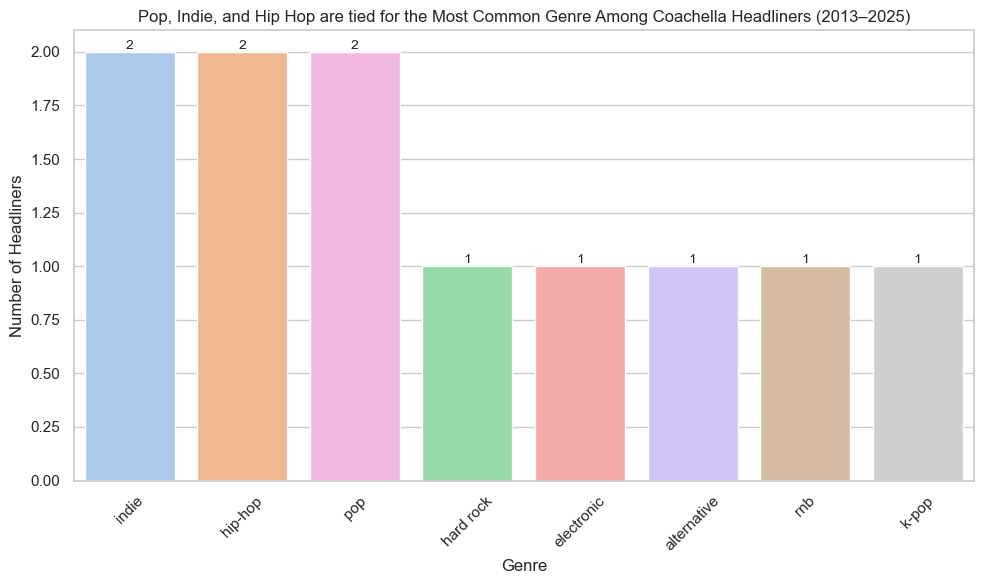

In [419]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))

genre_order = df['Top Genre'].value_counts().index

ax = sns.countplot(
    data = df,
    x = 'Top Genre',
    hue = 'Top Genre',
    order = genre_order,
    palette = 'pastel',
    legend = False
)

for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),
        ha = 'center', va = 'bottom',
        fontsize = 10
    )
plt.title("Pop, Indie, and Hip Hop are tied for the Most Common Genre Among Coachella Headliners (2013–2025)", fontsize = 12)
plt.xlabel("Genre")
plt.ylabel("Number of Headliners")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### 2.) Which Coachella headliners performed the longest setlists between 2013 and 2025

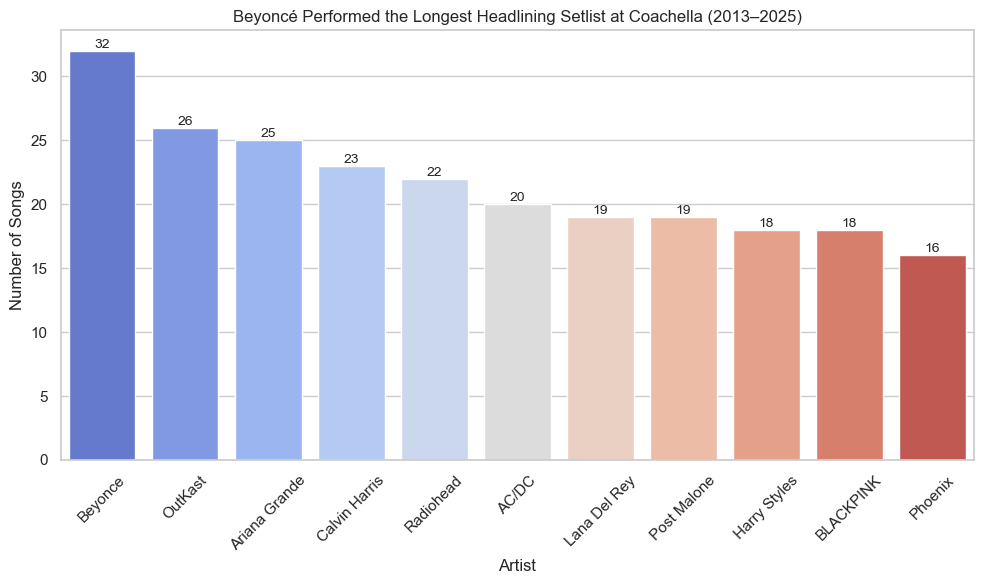

In [424]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))

top_headliners = df.sort_values(by = 'Song Count', ascending = False)

ax = sns.barplot(
    data = top_headliners, 
    x = 'Artist',
    y = 'Song Count',
    palette = 'coolwarm',
    hue = 'Artist',
    legend = False
)

for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),
        ha ='center', va ='bottom',
        fontsize = 10
    )

plt.title("Beyoncé Performed the Longest Headlining Setlist at Coachella (2013–2025)", fontsize = 12)
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### 3.) Did Coachella headliner's setlist lengths vary by genre from 2013 to 2025?

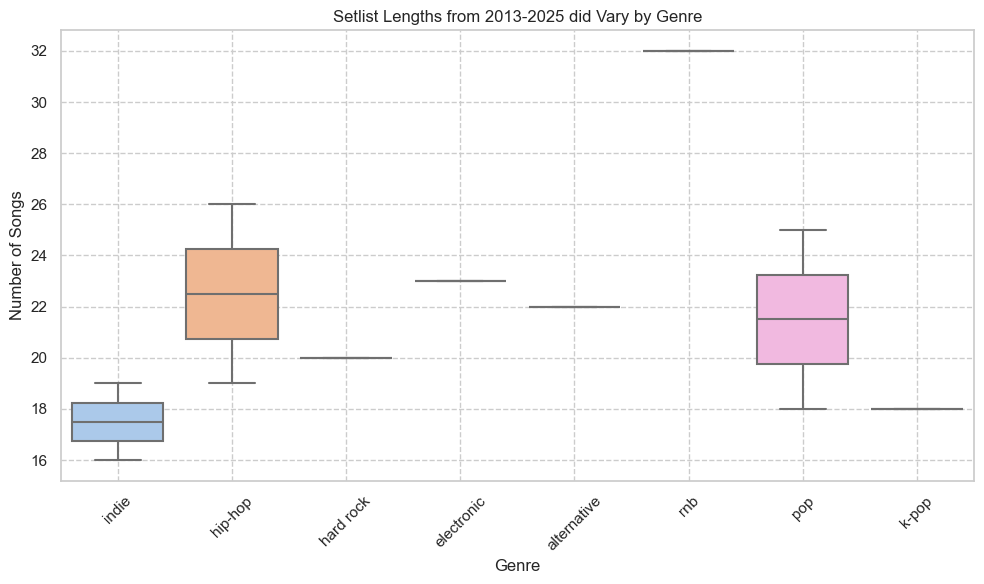

In [437]:
sns.set(style = "whitegrid", context = "notebook")
plt.figure(figsize = (10, 6))

ax = sns.boxplot(
    data = df,
    x = 'Top Genre',
    y = 'Song Count',
    palette = 'pastel',
    hue = 'Top Genre',
    linewidth = 1.5,
    width = 0.8,
    legend = False
)

plt.title("Setlist Lengths from 2013-2025 did Vary by Genre", fontsize = 12)
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.xticks(rotation = 45)
plt.grid(True, linestyle ='--')
plt.tight_layout()
plt.show()

#### 4.) Has the average number of songs performed by Coachella headliners increased over time from 2013 to 2025?


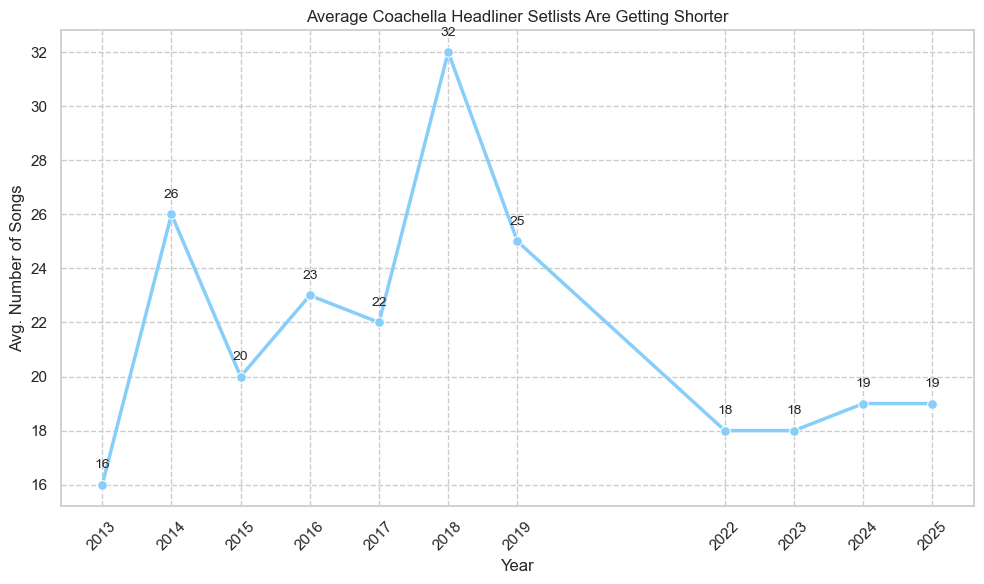

In [440]:
sns.set(style = "whitegrid", context = "notebook")
plt.figure(figsize = (10, 6))

yearly_avg = df.groupby('Year')['Song Count'].mean().reset_index()

ax = sns.lineplot(
    data = yearly_avg,
    x = 'Year',
    y = 'Song Count',
    marker = 'o',
    linewidth = 2.5,
    markersize = 7,
    color = 'lightskyblue'
)

for i in range(len(yearly_avg)):
    x = yearly_avg['Year'][i]
    y = yearly_avg['Song Count'][i]
    ax.text(x, y + 0.6, format(y, '.0f'), ha = 'center', fontsize = 10)

plt.title("Average Coachella Headliner Setlists Are Getting Shorter", fontsize = 12)
plt.xlabel("Year")
plt.ylabel("Avg. Number of Songs")
plt.xticks(yearly_avg['Year'], rotation = 45)
plt.grid(True, linestyle = '--')
plt.tight_layout()
plt.show()

***